<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 05 Prediction 1 - Random Forest

### Riccardo Spolaor (864877)

</center>

In [114]:
import numpy as np
import pandas as pd

In [115]:
dataframe = pd.read_csv('./datasets/dataframe03.csv', low_memory = False)

In [116]:
dataframe.head(10)

,Winner,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,RankFilledA,...,Kohlschreiber P.A,Kohlschreiber P.B,Simon G.A,Simon G.B,Bautista Agut R.A,Bautista Agut R.B,Verdasco F.A,Verdasco F.B,OtherA,OtherB
0,0,1.0,13,0,0,1,0,3.0,52.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1.0,13,0,0,1,0,3.0,88.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1.0,13,0,0,1,0,3.0,105.0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,1.0,13,0,0,1,0,3.0,63.0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,1.0,13,0,0,1,0,3.0,58.0,0,...,0,0,0,0,0,0,0,0,1,1
5,1,1.0,13,0,0,1,0,3.0,80.0,0,...,0,0,0,0,0,0,0,0,1,1
6,0,1.0,13,0,0,1,0,3.0,81.0,0,...,0,0,0,0,0,0,0,0,1,1
7,1,1.0,13,0,0,1,0,3.0,32.0,0,...,0,0,0,0,0,0,0,0,1,1
8,0,1.0,13,0,0,1,0,3.0,119.0,0,...,0,0,0,0,0,0,0,0,1,1
9,1,1.0,13,0,0,1,0,3.0,67.0,0,...,0,0,0,0,0,0,0,0,1,1


In [117]:
'''
# Vedo similarità tra giocatori che hanno partecipato all' Aus open 2019 rispetto ai giocatori negli anni (HA SENSO USARE JACCARD O C'E' DI MEGLIO?)
# Riproporre alla fine, quando dataframe è completo e validare il fatto di droppare righe in base ad accuracy

players2019 = set(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerA'].append(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerB']).unique())
print(type(players2019))
for i in range(0,int(max(dataframe['csvID']))) :
    players = set(dataframe[dataframe['csvID'] == i]['PlayerA'].append(dataframe[dataframe['csvID'] == i]['PlayerB']).unique())
    print ('Jaccard ', i + 2001, ': ', len(players2019 & players) / len( players2019 | players))
    
# Come c'era da aspettarsi i giocatori sono più simili a quelli del 2019 in rapporto alla cardinalità all'aumentare del tempo
# Prendo
'''

"\n# Vedo similarità tra giocatori che hanno partecipato all' Aus open 2019 rispetto ai giocatori negli anni (HA SENSO USARE JACCARD O C'E' DI MEGLIO?)\n# Riproporre alla fine, quando dataframe è completo e validare il fatto di droppare righe in base ad accuracy\n\nplayers2019 = set(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerA'].append(dataframe[dataframe['csvID'] == max(dataframe['csvID'])]['PlayerB']).unique())\nprint(type(players2019))\nfor i in range(0,int(max(dataframe['csvID']))) :\n    players = set(dataframe[dataframe['csvID'] == i]['PlayerA'].append(dataframe[dataframe['csvID'] == i]['PlayerB']).unique())\n    print ('Jaccard ', i + 2001, ': ', len(players2019 & players) / len( players2019 | players))\n    \n# Come c'era da aspettarsi i giocatori sono più simili a quelli del 2019 in rapporto alla cardinalità all'aumentare del tempo\n# Prendo\n"

In [118]:
#dataframe.drop(['PlayerA', 'PlayerB'], axis = 1, inplace = True)

In [119]:
'''
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def getRandomForestPrediction (index, df): 
    print(df.shape)
    print('csvID deleted up to: ', index)

    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    accuracies_valid = []
    accuracies_test = []
    
    for i in range(30,31,2):
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train,y_train)

        # compute Accuracy
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies_valid += [valid_acc]
    print ("\t Mean Validation Accuracy: {:.3f}".format(
        np.mean(accuracies_valid)) )
    

cutDataframes = [dataframe.drop(dataframe[dataframe['csvID'].isin(range(0, i))].index.values, axis =0) 
                 for i in range(0, int(max(dataframe['csvID'])))]

for i, df in enumerate(cutDataframes):
    getRandomForestPrediction (i, df)
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn import tree\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.ensemble import RandomForestClassifier\n\ndef getRandomForestPrediction (index, df): \n    print(df.shape)\n    print(\'csvID deleted up to: \', index)\n\n    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != \'Winner\'],  \n                                                        dataframe[\'Winner\'], test_size=0.33, shuffle = False, stratify=None)\n    accuracies_valid = []\n    accuracies_test = []\n    \n    for i in range(30,31,2):\n        rf = RandomForestClassifier(n_estimators=i)\n        rf.fit(X_train,y_train)\n\n        # compute Accuracy\n        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))\n        accuracies_valid += [valid_acc]\n    print ("\t Mean Validation Accuracy: {:.3f}".format(\n        np.mean(accuracies_valid)) )\n    \n\ncutDataframes = [dataframe.drop(dat

In [120]:
#dataframe = dataframe[dataframe['csvID'] > 16]

In [121]:
#dataframe.columns.values

In [122]:
dataframe.describe()

,Winner,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,RankFilledA,...,Kohlschreiber P.A,Kohlschreiber P.B,Simon G.A,Simon G.B,Bautista Agut R.A,Bautista Agut R.B,Verdasco F.A,Verdasco F.B,OtherA,OtherB
count,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,...,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000,52656.000000
mean,0.500000,32.972159,46.204421,8.492024,1.378608,0.826497,1.461258,3.385141,74.629634,0.001196,...,0.010027,0.010027,0.010388,0.010388,0.004235,0.004235,0.010350,0.010350,0.757274,0.757274
std,0.500005,18.013522,23.286516,9.659799,1.502595,0.378686,2.033304,0.788645,117.890478,0.034569,...,0.099634,0.099634,0.101393,0.101393,0.064940,0.064940,0.101209,0.101209,0.428735,0.428735
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,31.000000,0.000000,0.000000,1.000000,0.000000,3.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.500000,33.000000,48.000000,2.000000,1.000000,1.000000,1.000000,3.000000,51.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,49.000000,62.000000,18.000000,2.000000,1.000000,2.000000,3.000000,88.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,67.000000,88.000000,25.000000,4.000000,1.000000,7.000000,5.000000,2161.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

#Accuracy validation with a random forest classifier

def getRandomForestPrediction (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    accuracies_valid = []
    
    for i in range(2,30,5):
        rf = RandomForestClassifier(n_estimators=i)
        rf.fit(X_train,y_train)

        # compute Accuracy
        valid_acc = accuracy_score(y_true=y_valid, y_pred=rf.predict(X_valid))
        accuracies_valid += [valid_acc]
        print ("\t Estimators: {:2d} - Validation Accuracy: {:.3f}".format(
            i, valid_acc) )

getRandomForestPrediction()

	 Estimators:  2 - Validation Accuracy: 0.590
	 Estimators:  7 - Validation Accuracy: 0.635
	 Estimators: 12 - Validation Accuracy: 0.648
	 Estimators: 17 - Validation Accuracy: 0.654
	 Estimators: 22 - Validation Accuracy: 0.660
	 Estimators: 27 - Validation Accuracy: 0.659


In [124]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

# Accuracy valid with a treeclassifier
X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'], 
                                                          dataframe['Winner'], 
                                                          test_size = 0.33, 
                                                          stratify = None, shuffle = False)

accuracies = []

for max_leaves in range(2,30):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)
    
    print (dt.tree_.node_count)

    # compute Accuracy
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    valid_acc = accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
    print ("Leaves: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f} ".format(
        max_leaves,  train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]

best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

3
Leaves:  2 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
5
Leaves:  3 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
7
Leaves:  4 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
9
Leaves:  5 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
11
Leaves:  6 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
13
Leaves:  7 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
15
Leaves:  8 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
17
Leaves:  9 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
19
Leaves: 10 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
21
Leaves: 11 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
23
Leaves: 12 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
25
Leaves: 13 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
27
Leaves: 14 - Train Accuracy: 0.713 - Validation Accuracy: 0.677 
29
Leaves: 15 - Train Accuracy: 0.714 - Validation Accuracy: 0.677 
31
Leaves: 16 - Train Accuracy: 0.714 - Validation A

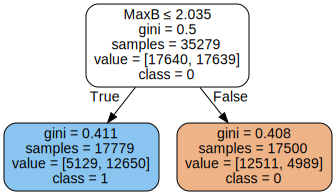

In [125]:
import graphviz 
import os

dt = tree.DecisionTreeClassifier(max_leaf_nodes=2)
dt.fit(X_train,y_train)

# COMMENTO DA AGGIUNGERE SEMPRE PER USAR GRAPHVIZ
os.environ["PATH"] += os.pathsep + 'C:/Users/ricca/Anaconda3/Graphviz/release/bin/'


f_names = ["Feature 1", "Feature 2"]

c_names = ["Class 0","Class 1"]

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=dataframe.loc[:, dataframe.columns != 'Winner'].columns, class_names=['0','1'],  
                                filled=True, rounded=True, special_characters=True)  


graph = graphviz.Source(dot_data)
graph

In [126]:
dt.tree_.node_count

3

In [127]:
#Feature Importance

def getPredImportance (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    rf = RandomForestClassifier(n_estimators=30)
    rf.fit(X_train,y_train)

    return rf.feature_importances_

featImp = getPredImportance()

In [128]:
#Print feature importance

for (j,k) in sorted((e,i) for i,e in enumerate(featImp)):
    print(dataframe.columns[k])

MaxB
PtsB
PtsA
AvgB
RankB
MaxA
Bautista Agut R.A
RankA
Simon G.B
AvgA
Zverev A.A
Dimitrov G.B
Nadal R.B
Del Potro J.M.A
Federer R.A
Tsonga J.W.B
Almagro N.B
Goffin D.A
Federer R.B
Berdych T.A
Nadal R.A
Ferrer D.A
Tsonga J.W.A
Murray A.A
Hard
Ferrer D.B
Murray A.B
Wawrinka S.B
Raonic M.A
Del Potro J.M.B
Zverev A.B
Thiem D.A
Gasquet R.B
Anderson K.B
Monfils G.B
Thiem D.B
Almagro N.A
Gasquet R.A
Cilic M.A
Cilic M.B
Berdych T.B
Dimitrov G.A
Isner J.B
Monfils G.A
Simon G.A
Nishikori K.A
Djokovic N.B
Kohlschreiber P.A
Isner J.A
Verdasco F.A
Nishikori K.B
Goffin D.B
Raonic M.B
Anderson K.A
Bautista Agut R.B
Kohlschreiber P.B
Wawrinka S.A
Djokovic N.A
Round
Clay
Series
Grass
AvgFilledB
Verdasco F.B
OtherA
Tournament
Location
Court
ATP
Winner
Best of
RankFilledA
RankFilledB
PtsFilledA
AvgFilledA
MaxFilledA
MaxFilledB
PtsFilledB


In [129]:
'''from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])
                                                        '''

"from sklearn.feature_selection import RFE\n\nrf_small = RandomForestClassifier(n_estimators=20)\nselector = RFE(rf_small, \n                 step=1, # features removed at each step\n                 n_features_to_select=1 # selected features\n                )\nfit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  \n                                                        dataframe['Winner'])\n                                                        "

In [130]:
#accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))